<a href="https://colab.research.google.com/github/mhyubr/Grow-With-EDE-LAB-2023/blob/main/GWE_5_Data_Science_Data_Preprocessing_using_Python_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GROW WITH EDELAB 5th DATA SCIENCE - Data Preprocessing using Python Programming

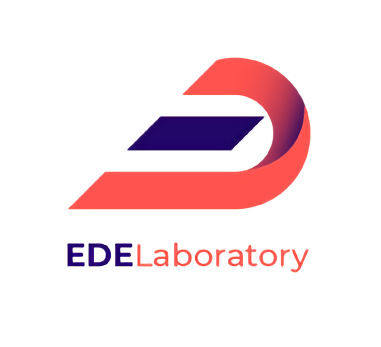

## Import Library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [ ]:
titanic = pd.read_csv('titanic.csv')
tips = pd.read_csv('tips.csv')
iris = pd.read_csv('iris.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Handling Missing Value

In [ ]:
# Menampilkan jumlah missing value pada setiap kolom
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Mengganti missing value pada kolom 'Age' dengan nilai median (Memiliki Outlier) 
titanic_drop_mv = titanic.dropna(inplace=False)

In [ ]:
print(titanic.shape)
print(titanic_drop_mv.shape)

(418, 12)
(87, 12)


In [ ]:
titanic['Age'].median()

27.0

In [ ]:
# Mengganti missing value pada kolom 'Age' dengan nilai median (Tidak Memilii Outlier) 
titanic['Fare'].fillna(titanic['Fare'].mean(), inplace=True)

In [ ]:
# Mengganti missing value pada kolom 'Age' dengan nilai median (Memiliki Outlier) 
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

In [ ]:
# Menampilkan jumlah missing value pada setiap kolom
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
titanic['Cabin'].mode()

0    B57 B59 B63 B66
Name: Cabin, dtype: object

In [ ]:
# Mengganti missing value pada kolom 'Embarked' dengan nilai modus (Data Kategorik)
titanic['Cabin'].fillna(titanic['Cabin'].mode()[0], inplace=True)

In [ ]:
# Mengganti missing value pada kolom 'Embarked' dengan nilai modus (Data Kategorik)
titanic['Cabin'].fillna(titanic['Cabin'].mode()[0], inplace=True)

In [ ]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Handling Outliers

In [ ]:
# Menampilkan distribusi data pada kolom 'total_bill' sebelum dilakukan handling 
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<Axes: xlabel='total_bill'>

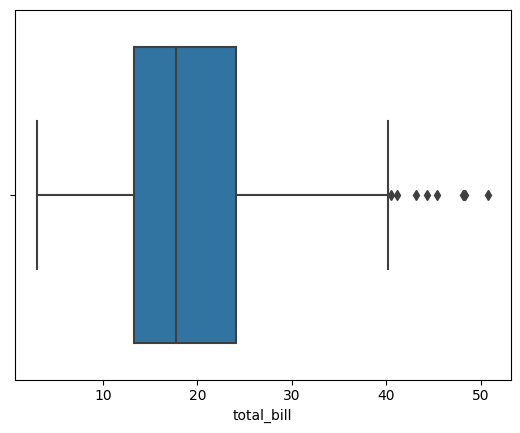

In [ ]:
sns.boxplot(tips, x='total_bill')

<Axes: xlabel='total_bill'>

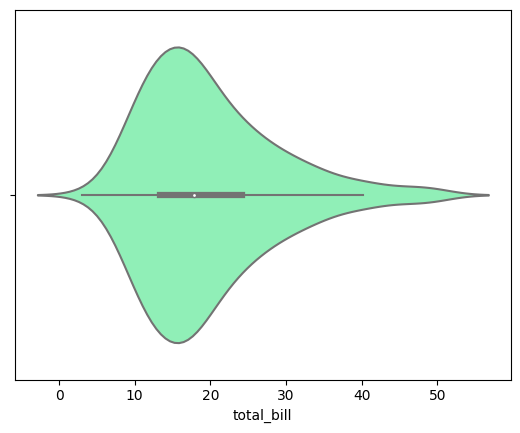

In [ ]:
sns.violinplot(tips, x='total_bill', palette='rainbow')

In [ ]:
# Mencari nilai Q1 dan Q3 pada kolom 'total_bill'
Q1 = tips['total_bill'].quantile(0.25)
Q3 = tips['total_bill'].quantile(0.75)

print('Kuartil 1:', Q1)
print('Kuartil 3:', Q3)

Kuartil 1: 13.3475
Kuartil 3: 24.127499999999998


In [ ]:
# Menghitung IQR pada kolom 'total_bill'
IQR = Q3 - Q1

In [ ]:
# Menghitung batas bawah dan batas atas pada kolom 'total_bill' untuk menentukan outlier
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [ ]:
# Mengidentifikasi outlier pada kolom 'total_bill'
outliers = tips[(tips['total_bill'] < lower_limit) | (tips['total_bill'] > upper_limit)]
outliers

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [ ]:
# Menghapus outlier pada kolom 'total_bill'
tips_no_outliers = tips[(tips['total_bill'] >= lower_limit) & (tips['total_bill'] <= upper_limit)]
tips_no_outliers

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='total_bill'>

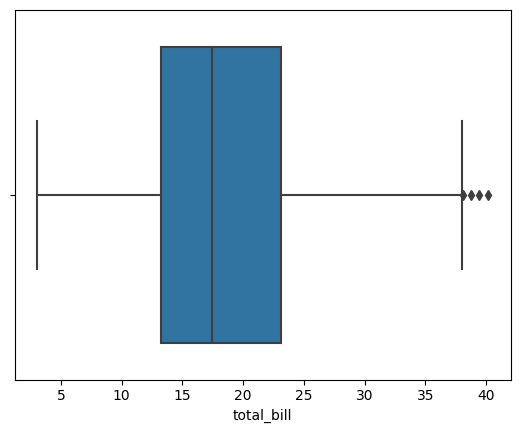

In [ ]:
sns.boxplot(tips_no_outliers, x='total_bill')

<Axes: xlabel='total_bill'>

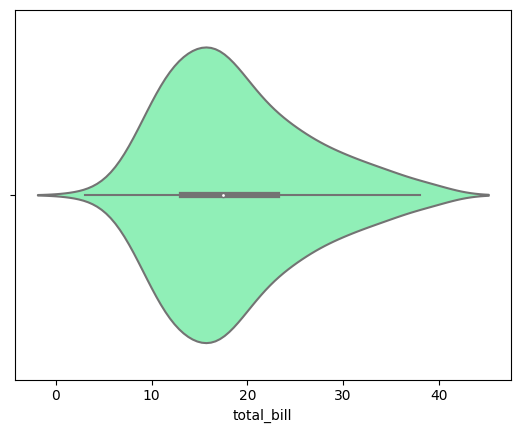

In [ ]:
sns.violinplot(tips_no_outliers, x='total_bill', palette='rainbow')

In [ ]:
from sklearn.ensemble import IsolationForest

# Membuat model Isolation Forest
iso = IsolationForest(contamination=0.05)

total_bill = tips['total_bill'].to_frame()
# Fitting model dengan data

iso.fit(total_bill)

# Menentukan outlier
outliers = iso.predict(total_bill) == -1
data_no_outliers = total_bill[~outliers]
data_no_outliers

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


<Axes: >

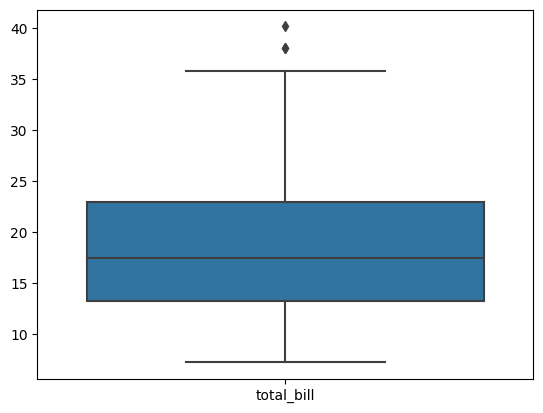

In [ ]:
sns.boxplot(data_no_outliers)

## Handling Categorical Data

### One Hot Encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# membuat instance OneHotEncoder
encoder = OneHotEncoder()

In [ ]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [ ]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# fitting dan transform data
data_encoded = encoder.fit_transform(iris[['species']])

In [ ]:
# mengubah hasil encoding menjadi array
data_array = data_encoded.toarray()
data_array

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# membuat dataframe dari hasil encoding
data_final = pd.DataFrame(data_array, columns=iris.species.unique())
data_final

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


## Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Contoh data ordinal
data_ordinal = ['muda', 'tua', 'paruh baya', 'muda', 'paruh baya', 'tua', 'muda', 'bayi']

In [ ]:
# Inisiasi LabelEncoder
le = LabelEncoder()

In [ ]:
# Fitting dan transform data ordinal
data_label_encoded = le.fit_transform(data_ordinal)

In [ ]:
print('Data asli:', data_ordinal)
print('Data encoded:', data_label_encoded)

Data asli: ['muda', 'tua', 'paruh baya', 'muda', 'paruh baya', 'tua', 'muda', 'bayi']
Data encoded: [1 3 2 1 2 3 1 0]


## Ordinal Encoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# Contoh data ordinal
data_ordinal = ['muda', 'tua', 'paruh baya', 'muda', 'paruh baya', 'tua', 'muda', 'bayi']
data_ordinal

['muda', 'tua', 'paruh baya', 'muda', 'paruh baya', 'tua', 'muda', 'bayi']

In [ ]:
# Reshape data menjadi array 2D (karena ordinal encoder harus menggunakan data 2D bukan 1D)
data_ordinal = [[x] for x in data_ordinal]
data_ordinal

[['muda'],
 ['tua'],
 ['paruh baya'],
 ['muda'],
 ['paruh baya'],
 ['tua'],
 ['muda'],
 ['bayi']]

In [ ]:
# Inisiasi OrdinalEncoder
oe = OrdinalEncoder(categories=[['bayi','muda','tua','paruh baya']])

In [ ]:
# Fitting dan transformasi data
data_ordinal_encoded = oe.fit_transform(data_ordinal)

In [ ]:
print('Data asli:', data_ordinal)
print('Data encoded:\n', data_ordinal_encoded)

Data asli: [['muda'], ['tua'], ['paruh baya'], ['muda'], ['paruh baya'], ['tua'], ['muda'], ['bayi']]
Data encoded:
 [[1.]
 [2.]
 [3.]
 [1.]
 [3.]
 [2.]
 [1.]
 [0.]]


## Scaling Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# Dataset
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [ ]:
print('== TOTAL BILL ==')
print('Min : ', tips['total_bill'].min())
print('Max : ', tips['total_bill'].max())

== TOTAL BILL ==
Min :  3.07
Max :  50.81


In [ ]:
print('== TIP ==')
print('Min : ', tips['tip'].min())
print('Max : ', tips['tip'].max())

== TIP ==
Min :  1.0
Max :  10.0


In [ ]:
# pilih kolom yang ingin discaling
cols_to_scale = tips[['total_bill', 'tip']]

### MinMaxScaller

In [ ]:
# Min-max scaling
scaler = MinMaxScaler()

In [ ]:
# Fit and transform the data
minmax = scaler.fit_transform(cols_to_scale)
# minmax

In [ ]:
# konversi hasil scaling menjadi dataframe
tips_minmax = pd.DataFrame(minmax, columns=['total_bill', 'tip'])

In [ ]:
tips_minmax

,total_bill,tip
0,0.291579,0.001111
1,0.152283,0.073333
2,0.375786,0.277778
3,0.431713,0.256667
4,0.450775,0.290000
...,...,...
239,0.543779,0.546667
240,0.505027,0.111111
241,0.410557,0.111111
242,0.308965,0.083333


In [ ]:
print('== TOTAL BILL ==')
print('Min : ', tips_minmax['total_bill'].min())
print('Max : ', tips_minmax['total_bill'].max())

== TOTAL BILL ==
Min :  0.0
Max :  0.9999999999999999


In [ ]:
print('== TIP ==')
print('Min : ', tips_minmax['tip'].min())
print('Max : ', tips_minmax['tip'].max())

== TIP ==
Min :  0.0
Max :  1.0


### StandardScaller

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [ ]:
# Fit and transform the data
standard = scaler.fit_transform(cols_to_scale)
# standard

In [ ]:
# konversi hasil scaling menjadi dataframe
tips_standard = pd.DataFrame(standard, columns=['total_bill', 'tip'])

In [ ]:
tips_standard

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


In [ ]:
print('== TOTAL BILL ==')
print('Min : ', tips_standard['total_bill'].min())
print('Max : ', tips_standard['total_bill'].max())

== TOTAL BILL ==
Min :  -1.8815465222725365
Max :  3.492067936654957


In [ ]:
print('== TIP ==')
print('Min : ', tips_standard['tip'].min())
print('Max : ', tips_standard['tip'].max())

== TIP ==
Min :  -1.4471891333585338
Max :  5.070771687133162


In [ ]:
tips_standard.describe()

,total_bill,tip
count,2.440000e+02,2.440000e+02
mean,-7.871663e-17,2.839259e-16
std,1.002056e+00,1.002056e+00
min,-1.881547e+00,-1.447189e+00
25%,-7.247111e-01,-7.229713e-01
50%,-2.241005e-01,-7.117518e-02
75%,4.886857e-01,4.086192e-01
max,3.492068e+00,5.070772e+00


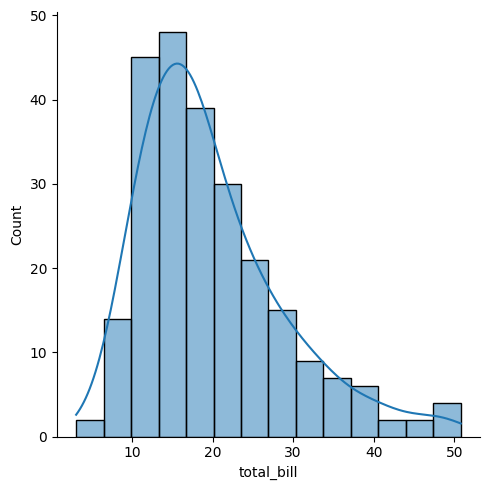

In [ ]:
sns.displot(tips, x='total_bill', kde=True)

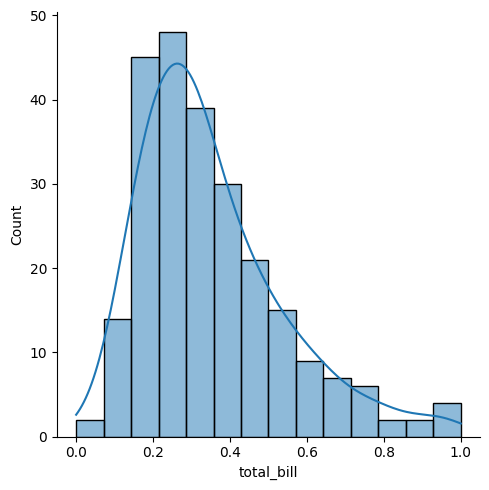

In [ ]:
sns.displot(tips_minmax, x='total_bill', kde=True)

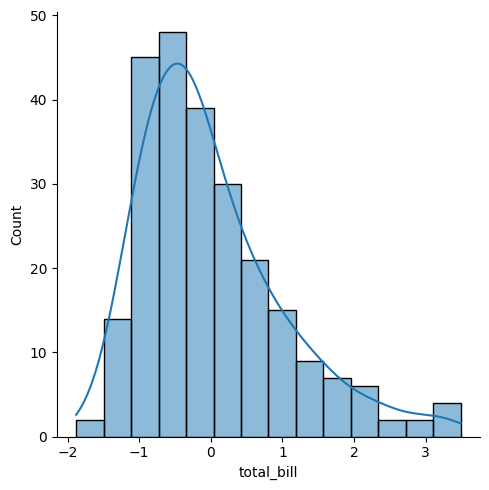

In [ ]:
sns.displot(tips_standard, x='total_bill', kde=True)

## Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Pisahkan antara features dan target
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [ ]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Baris Data Titanic:", titanic.shape[0])

Baris Data Titanic: 418


In [ ]:
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 334
Jumlah data testing: 84
